In [15]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Visualize effect of changing dataset size on other dataset / model combinations

In [84]:
def get_results_data(root, all_trial_data=None):
    if all_trial_data is None:
        all_trial_data = {}
    for root, dir, files in os.walk(root):
        for f in files:
            if "results" in f:
                trial_id = '_'.join(f.split("_")[1:]).split('.')[0]
                all_trial_data[trial_id] = {'df': pd.read_csv(os.path.join(root, f), index_col = 0)}
    return all_trial_data

data = get_results_data("/home/alex/datasets/hparam_results_20221228")
data = get_results_data("/home/alex/datasets/hparam_results_20221217", data)

Fix trial ids

In [88]:
data['lr_opt_20221109_cnn2_mnist'].keys()

dict_keys(['df'])

In [91]:
perc_ids = {
    '': '100%',
    '_0_75': '75%',
    '_0_5': '50%',
    '_0_25': '25%',
    '_0_1': '10%',
}

data2 = {}
for key in data.keys():
    if 'cnn2' not in key and 'resnet18' not in key:
        splitkey = key.split("_")
        splitkey.insert(3, "cnn2")
        newkey = "_".join(splitkey)
        data2[newkey] = data[key]
    else:
        data2[key] = data[key]

data = data2
for key in data.keys():
    data[key]['model'] = key.split("_")[3]
    data[key]['dataset'] = key.split("_")[4]
    data[key]['dataset_size'] = perc_ids[key.split(data[key]['dataset'])[-1]]

In [93]:
data['lr_opt_20221109_cnn2_mnist'].keys()

dict_keys(['df', 'model', 'dataset', 'dataset_size'])

In [100]:
def plot_dataset_size_change(data, model, dataset, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    ax.set_yscale('log')
    ax.set_xscale("log")
    ax.set_xlabel("learning rate")
    ax.set_ylabel("validation loss")
    dataset_sizes = ['100%', '75%', '50%', '25%', '10%']
    for s in dataset_sizes:
        for key in data.keys():
            if data[key]['model'] == model and \
                data[key]['dataset'] == dataset and \
                data[key]['dataset_size'] == s:
                lr = data[key]['df']['config/optimizer_cfg/args/lr']
                val_loss = data[key]['df']['val_loss']
                ax.scatter(lr, val_loss, label=perc_ids[key.split(dataset)[-1]])
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    ax.set_title(f"dataset = {dataset}, model = {model}")
    return ax


lr_opt_20221217_resnet18_mnist
lr_opt_20221217_resnet18_mnist_0_75
lr_opt_20221217_resnet18_mnist_0_5
lr_opt_20221217_resnet18_mnist_0_25
lr_opt_20221217_resnet18_cifar10
lr_opt_20221217_resnet18_cifar10_0_75
lr_opt_20221217_resnet18_cifar10_0_5
lr_opt_20221217_resnet18_cifar10_0_25
lr_opt_20221109_cnn2_mnist
lr_opt_20221109_cnn2_mnist_0_75
lr_opt_20221109_cnn2_mnist_0_5
lr_opt_20221109_cnn2_mnist_0_25
lr_opt_20221109_cnn2_mnist_0_1
lr_opt_20221217_cnn2_cifar10
lr_opt_20221217_cnn2_cifar10_0_75
lr_opt_20221217_cnn2_cifar10_0_5
lr_opt_20221217_cnn2_cifar10_0_25


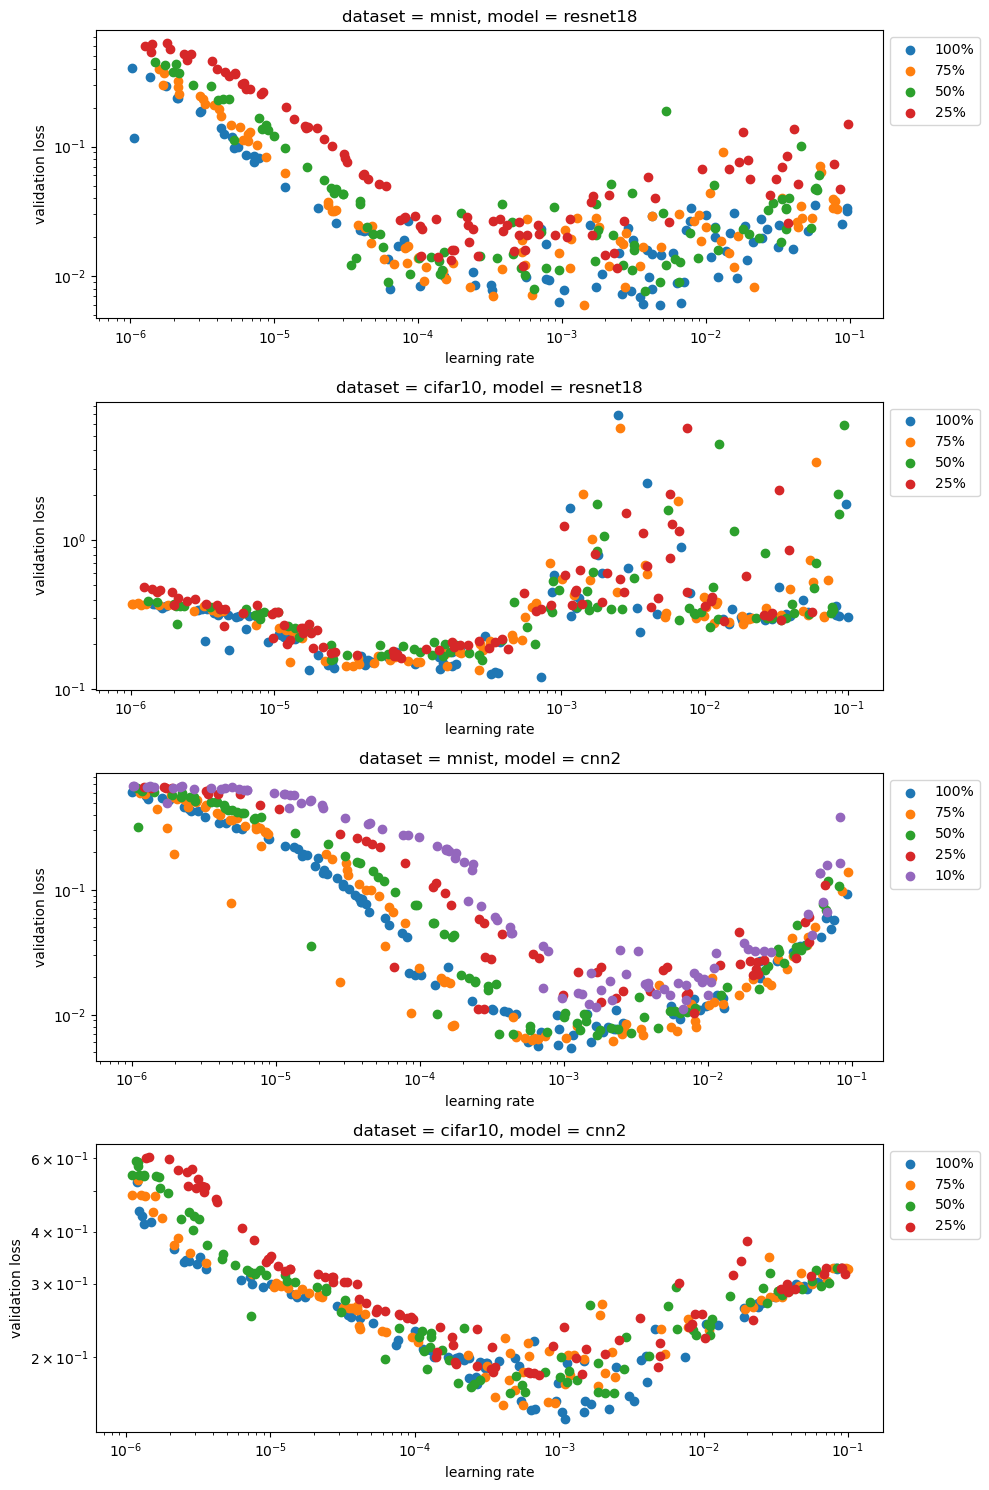

In [102]:
### TODO: fix visualization so that the percentages are in the same oder every time

models = ['resnet18', 'cnn2']
datasets = ['mnist', 'cifar10']
prod = [(m, d) for m in models for d in datasets]

fig, axes = plt.subplots(nrows=4, figsize=[10, 15])

for i, ax in enumerate(axes):
    mod, dataset = prod[i][0], prod[i][1]
    plot_dataset_size_change(data, mod, dataset, ax=ax)

fig.tight_layout()

## Conclusions

- This pattern does not seem to be repeating for the other dataset / model combinations. However, it is very difficult to do this with a spot check due to the noise. 
- next iteration of project: try these 4 trials again with a grid search. Change learning rate to be 1e-5 to 1e-3, pick 50 points in logspace, and do each learing rate 3 times to get some proper errorbars.

## TODOs:

- Should dig a bit deeper into how long each sample was trained for (which trials made it the full 10 epochs)
- is raytune reporting the best lr period or the lr when the trial is terminated? 
